In [64]:
import yt
import os
import numpy as np
import matplotlib.pyplot as plt

def KlebeRichtigZusammen(ad, var):
  xs = [float(grid.LeftEdge[0]) for grid in ad.index.grids]
  enumerated = list(enumerate(xs))
  sorted_keys = [k for (k,v) in sorted(enumerated, key=lambda xs: xs[1])]
  grids = [np.array(ad.index.grids[k][var]) for k in sorted_keys]
  grids = [x.reshape((x.shape[0],)) for x in grids]
  p = np.concatenate(grids)
  return p

def PrintProgress(i, plotfiles):
  ny = len(plotfiles)
  progress = int(100.0 * float(i) / (ny - 1))
  print('[{:3d}%] Reading plotfile {}'.format(progress, plotfiles[i]))

yt.funcs.mylog.setLevel(20)
output_dir = '/group/ag_klima/SFB1029_C01/SEC_Plenum/Plotfiles/Tube1'

dirs = os.listdir(output_dir)
plotfiles = ['{}/{}'.format(output_dir, plt) for plt in dirs]
list.sort(plotfiles)
plotfiles = plotfiles[0:2]
ds = yt.load(plotfiles[1])

print(ds.index.grids[0])

ad = ds.all_data()
p = KlebeRichtigZusammen(ad, 'Pressure')


nx = p.shape[0]
ny = 2 # len(plotfiles)


PrintProgress(0, plotfiles)
x0 = ad.index.grids[0].LeftEdge[0]
xEnd = ad.index.grids[-1].RightEdge[0]
ts = np.zeros((ny,1))
ts[0] = ds.current_time
imdata = np.zeros(shape=(nx, ny))
imdata[:,0] = p

# disable logging to prevent spam
for i in range(1,ny):
  PrintProgress(i, plotfiles)
  ds = yt.load(plotfiles[i])
  ad = ds.all_data()
  p = KlebeRichtigZusammen(ad, 'Pressure')
  imdata[:,i] = p
  ts[i] = ds.current_time


yt : [INFO     ] 2021-01-05 12:30:08,299 Parameters: current_time              = 0.010000000001
yt : [INFO     ] 2021-01-05 12:30:08,299 Parameters: domain_dimensions         = [480   1   1]
yt : [INFO     ] 2021-01-05 12:30:08,300 Parameters: domain_left_edge          = [-1.    -0.015  0.   ]
yt : [INFO     ] 2021-01-05 12:30:08,300 Parameters: domain_right_edge         = [-0.09   0.015  1.   ]
yt : [INFO     ] 2021-01-05 12:30:08,428 Parameters: current_time              = 0.010000000001
yt : [INFO     ] 2021-01-05 12:30:08,429 Parameters: domain_dimensions         = [480   1   1]
yt : [INFO     ] 2021-01-05 12:30:08,429 Parameters: domain_left_edge          = [-1.    -0.015  0.   ]
yt : [INFO     ] 2021-01-05 12:30:08,430 Parameters: domain_right_edge         = [-0.09   0.015  1.   ]


BoxlibGrid_0000
[  0%] Reading plotfile /group/ag_klima/SFB1029_C01/SEC_Plenum/Plotfiles/Tube1/plt000000000
[100%] Reading plotfile /group/ag_klima/SFB1029_C01/SEC_Plenum/Plotfiles/Tube1/plt000000016


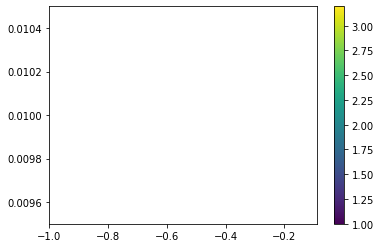

In [66]:
import matplotlib.pyplot as plt

#plt.plot(imdata[:,1])
im = plt.imshow(imdata, interpolation='none', extent=(x0, xEnd, t0, tEnd), aspect='auto')
plt.colorbar(im)
plt.show()